# Progetto di Data and Web Mining
## Autore: Sofia Crudu

In [1]:
import pandas as pd
import numpy as np
import ast
import re
import seaborn as sns
from sklearn import metrics
from datetime import timedelta, date
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.preprocessing import PolynomialFeatures 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.feature_selection import RFECV

## Loading the data

In [2]:
#Carico i dati
train = pd.read_csv("./datasets/train.csv")
test = pd.read_csv("./datasets/test.csv")

## Initial exploration of the data

In [3]:
train

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590
2997,2998,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761
2998,2999,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www

In [4]:
test

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4393,7394,NaN,42000000,"[{'id': 53, 'name': 'Thriller'}]",NaN,tt0218922,en,Original Sin,A young man is plunged into a life of subterfu...,9.970359,...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",8/3/01,118.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,This is not a love story - it's a story about ...,Original Sin,"[{'id': 515, 'name': 'women'}, {'id': 572, 'na...","[{'cast_id': 17, 'character': 'Julia Russell/B...","[{'credit_id': '52fe4330c3a36847f80412db', 'de..."
4394,7395,"[{'id': 146534, 'name': 'Without a Paddle Coll...",19000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,tt0364751,en,Without a Paddle,"Three friends, whose lives have been drifting ...",6.046516,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",8/20/04,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The call of the wild, the thrill of adventure....",Without a Paddle,"[{'id': 4959, 'name': 'death of a friend'}, {'...","[{'cast_id': 40, 'character': 'Dan Mott', 'cre..

In [5]:
print("Nr columns and rows of the train set: ", train.shape)
print("Nr columns and rows of the test set: ", test.shape)

Nr columns and rows of the train set:  (3000, 23)
Nr columns and rows of the test set:  (4398, 22)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [7]:
print("Train set missing values:\n", train.isna().sum())
print("\nTest set missing values:\n", test.isna().sum())

Train set missing values:
 id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

Test set missing values:
 id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
ove

In [8]:
test.loc[test['release_date'].isnull() == True, 'release_date']
test.loc[828]['title']
#Google search shows that the release date of the movie was on 5th May 2000

'Jails, Hospitals & Hip-Hop'

## Data Analysis and Feature Engineering

In [9]:
columns_to_drop = ['id', 'imdb_id', 'original_title', 'poster_path', 'title', 'status']

def common_features(train, test):
    return list(set(test.columns).intersection(set(train.columns)))

def drop_uncommons(train, test):
    commons = common_features(train, test)

    for col in train.columns:
        if (col not in commons):
            train = train.drop(col, axis=1)
    for col in test.columns:
        if (col not in commons):
            test = test.drop(col, axis=1)
    return train, test 

def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

def json_to_dict(df):
    for col in json_cols:
        df[col] = df[col].apply(lambda x: get_dictionary(x))
    return df
        
def data_processed(df, column):
    df[column] = df[column].fillna("")
    df[column+'_names'] = df[column].apply(lambda x: re.findall("'name': \'(.+?)\'", x))
    df['num_'+column] = df[column+'_names'].apply(lambda x: len(x))
    return df
    
def top_actors(df):
    actors_dict = {}
    size_of_actors = df.cast.count()

    for element in df[['revenue', 'cast_names']].values:
        for actor in element[1]:
            if actor not in actors_dict:      
                actors_dict[actor] = element[0]
            else:
                actors_dict[actor] += element[0]

    for actor in actors_dict:
        actors_dict[actor] = actors_dict[actor]/size_of_actors
    actors_dict = {k: v for k, v in sorted(actors_dict.items(), key=lambda item: item[1], reverse = True)}
    return actors_dict

def check_top_actors(cast, actors_dict):
    if len(cast) < 1:
        return 0
    count = 0
    for actor in cast[:5]:
        if actor in list(actors_dict)[:100]:
            count += 1
    return count

def cast(train, test):
    train = data_processed(train, 'cast')
    test = data_processed(test, 'cast')
    cast_dict = {}
    cast_dict = top_actors(train)
    train["num_female_cast"] = train["cast"].str.count("'gender': 1")
    test["num_female_cast"] = test["cast"].str.count("'gender': 1")
    train["num_male_cast"] = train["cast"].str.count("'gender': 2")
    test["num_male_cast"] = test["cast"].str.count("'gender': 2")
    train['num_top_actors'] = train['cast_names'].apply(lambda x: check_top_actors(x, cast_dict))
    test['num_top_actors'] = test['cast_names'].apply(lambda x: check_top_actors(x, cast_dict))
    train = train.drop(['cast_names', 'cast'], axis = 1) 
    test = test.drop(['cast_names', 'cast'], axis = 1) 
    return train, test

def crew(df):
    df["crew"] = df["crew"].fillna("")
    df["num_crew"] = df["crew"].str.count("'job")
    df["num_female_crew"] = df["crew"].str.count("'gender': 1")
    df["num_male_crew"] = df["crew"].str.count("'gender': 2")
    df["num_directors"] = df["crew"].str.count("Directing")
    df["num_producers"] = df["crew"].str.count("Production")    
    df["num_editors"] = df["crew"].str.count("Editing")
    df = df.drop(['crew'], axis = 1) 
    return df
    
def Keywords(df):  
    df['Keywords'] = df.Keywords.apply(lambda x: 1 if type(x) == str else 0)
    return df

def fill_runtime(df):
    median_runtime = df[df['runtime'] > 0]['runtime'].median()
    df['runtime_is_median'] = 0
    df.loc[df.runtime == 0, 'runtime_is_median'] = 1
    df.loc[df.runtime.isnull() == True, 'runtime_is_median'] = 1
    df.loc[df.runtime == 0, 'runtime'] = median_runtime
    df.loc[df.runtime.isnull() == True, 'runtime'] = median_runtime
    return df

def fill_budget(df):
    median_budget = df[df['budget'] > 0]['budget'].median()
    df['budget_is_median'] = 0
    df.loc[df.budget == 0, 'budget_is_median'] = 1
    df.loc[df.budget.isnull() == True, 'budget_is_median'] = 1
    df.loc[df.budget == 0, 'budget'] = median_budget
    df.loc[df.budget.isnull() == True, 'budget'] = median_budget
    return df

def genre_encoding(series):
    string_list = []
    for i in series:
        string = []
        if (i != ""):
            o = ast.literal_eval(i)
            for i in o:
                for j in i.items():
                    if (j[0] == 'name'):
                        string.append(j[1])
        string_list.append(' + '.join(string))
    return LabelEncoder().fit_transform(string_list)

def unpackCol(list, df):
    for i in range(len(df)):
        for name in list[i]:
            if name not in df.columns:
                df[name] = 0
            df[name][i] = 1
            
def genres_by_mean_revenue(df):
    unpackCol(df['genres_names'], df)
    genresList = []
    genresDict = dict()
    for genre in df["genres_names"]:
        for elem in genre:
            if elem not in genresList:
                genresList.append(elem)
    for column in df.columns[1:]:
        if column in genresList:
            genresDict[column] = df.loc[df[column] == 1]['revenue'].mean()
    sorted_dict = {}
    sorted_keys = sorted(genresDict, key=genresDict.get, reverse=True) 
    for w in sorted_keys:
        sorted_dict[w] = genresDict[w]
    return sorted_dict, genresList

def genres(train, test):
    train = data_processed(train, 'genres')
    test = data_processed(test, 'genres')
    genre_dict = dict()
    genre_list = []
    genre_dict, genre_list = genres_by_mean_revenue(train)
    unpackCol(test['genres_names'], test)   
    for i, key in enumerate(genre_dict):
        if (i>=0 and i<5):
            genre_list.remove(key)
    train = train.drop(genre_list, axis = 1)
    test = test.drop(genre_list, axis = 1, errors='ignore')
    train['genres'] = genre_encoding(train['genres'])
    test['genres'] = genre_encoding(test['genres'])
    train = train.drop(['genres_names'], axis = 1)  
    test = test.drop(['genres_names'], axis = 1)  
    return train, test

def production_companies(df):
    df = data_processed(df, 'production_companies')
    df = df.drop(['production_companies_names', 'production_companies'], axis = 1) 
    return df

def production_countries(df):
    df = data_processed(df, 'production_countries')
    df['usa_produced'] = df.production_countries_names.apply(lambda x: 1 if 'United States of America' in x else 0)
    df = df.drop(['production_countries_names', 'production_countries'], axis = 1) 
    return df

def spoken_languages(df):
    df = data_processed(df, 'spoken_languages')
    df = df.drop(['spoken_languages_names', 'spoken_languages'], axis = 1) 
    return df

def overview(df): 
    df['overview'] = df.overview.fillna("")
    df['overview'] = df.overview.str.split().str.len()
    return df

def fill_missing_values(df):
    df = df.fillna('0')
    return df

def original_language(df):
    df['in_english'] = df.original_language.apply(lambda x: 1 if x == 'en' else 0)
    le = LabelEncoder()
    le.fit(df['original_language'])
    df['original_language'] = le.transform(df['original_language'])
    return df

# This feature will store 0 for movies that don't have a homepage, and 1 for movies that do
def homepage(df):
    df['homepage'] = df['homepage'].apply(lambda x: 0 if x == '0' else 1)
    return df

def belongs_to_collection(df): 
    df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if x == '0' else 1)
    return df

def tagline(df): 
    df['tagline'] = df['tagline'].apply(lambda x: 0 if x == '0' else 1)
    return df

def date_features(df):
    df[['release_month','release_day','release_year']]=df['release_date'].str.split('/',expand=True).replace(np.nan, 0).astype(int)
    df['release_year'] = df['release_year']
    df.loc[ (df['release_year'] <= 20) & (df['release_year'] < 100), "release_year"] += 2000
    df.loc[ (df['release_year'] > 20)  & (df['release_year'] < 100), "release_year"] += 1900
    df['release_date'] = pd.to_datetime(df['release_date'])
    df['release_month'] = df['release_date'].dt.month
    df['release_day'] = df['release_date'].dt.day
    df['release_dayofweek'] = df['release_date'].dt.dayofweek
    df['release_quarter'] = df['release_date'].dt.quarter
    for col in range (1,5) :
        df['quarter'+str(col)] = df['release_quarter'].apply(lambda x: 1 if x == col else 0)
    df = df.drop(columns=['release_date'], axis = 1)
    return df

def year_to_budget_ratio(df):
    df['year_to_budget_ratio'] = df.apply(lambda x: (x.budget / x.release_year), axis=1)
    return df
    
def prepare_data(train, test):
    test.loc[test['release_date'].isnull() == True, 'release_date'] = '05/05/2000'
    train, test = cast(train, test)
    train = crew(train)
    test = crew(test)
    train = Keywords(train)
    test = Keywords(test)
    train = fill_runtime(train)
    test = fill_runtime(test)
    train = fill_budget(train)
    test = fill_budget(test)
    train, test = genres(train, test)
    train = production_companies(train)
    test = production_companies(test)
    train = production_countries(train)
    test = production_countries(test)
    train = spoken_languages(train)
    test = spoken_languages(test)
    train = overview(train)
    test = overview(test)
    train = fill_missing_values(train)
    test = fill_missing_values(test)
    train = original_language(train)
    test = original_language(test)
    train = homepage(train)
    test = homepage(test)
    train = belongs_to_collection(train)
    test = belongs_to_collection(test)
    train = tagline(train)
    test = tagline(test)
    train = date_features(train)
    test = date_features(test)
    train = year_to_budget_ratio(train)
    test = year_to_budget_ratio(test)
    train = train.drop(columns_to_drop, axis = 1)
    test_index = test['id']
    test = test.drop(columns_to_drop, axis = 1)
    return train, test, test_index

In [10]:
train_df, test_df, test_index = prepare_data(train, test)

<ipython-input-9-2eae8298c385>:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name][i] = 1


In [11]:
print("Nr columns and rows of the train set: ", train_df.shape)
print("Nr columns and rows of the test set: ", test_df.shape)

Nr columns and rows of the train set:  (3000, 44)
Nr columns and rows of the test set:  (4398, 43)


In [12]:
print("Train set missing values:\n", train_df.isna().sum())
print("\nTest set missing values:\n", test_df.isna().sum())

Train set missing values:
 belongs_to_collection       0
budget                      0
genres                      0
homepage                    0
original_language           0
overview                    0
popularity                  0
runtime                     0
tagline                     0
Keywords                    0
revenue                     0
num_cast                    0
num_female_cast             0
num_male_cast               0
num_top_actors              0
num_crew                    0
num_female_crew             0
num_male_crew               0
num_directors               0
num_producers               0
num_editors                 0
runtime_is_median           0
budget_is_median            0
num_genres                  0
Family                      0
Animation                   0
Adventure                   0
Science Fiction             0
Fantasy                     0
num_production_companies    0
num_production_countries    0
usa_produced                0
num_spoken_la

### Budget

In [13]:
print('Movies missing a budget:',train_df.budget.isna().sum())

Movies missing a budget: 0


In [14]:
corr, _ = pearsonr(train_df['budget'], train_df['revenue'])
print('Pearsons correlation between budget and revenue: %.3f' % corr)

Pearsons correlation between budget and revenue: 0.747


Text(0, 0.5, 'revenue')

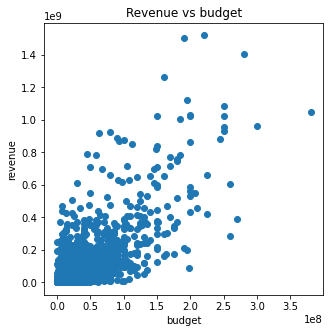

In [15]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(train_df['budget'], train_df['revenue'])
ax.set_title('Revenue vs budget');
ax.set_xlabel("budget")
ax.set_ylabel("revenue")

### Belongs to Collection
L'appartenenza a una collezione ha il potenziale di essere una caratteristica importante nella previsione delle entrate poiché i clienti potrebbero essere più propensi a pagare per un'esperienza cinematografica in cui hanno già investito tempo e denaro.

In [16]:
corr, _ = pearsonr(train_df['belongs_to_collection'], train_df['revenue'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.339


### Genres

In [17]:
corr, _ = pearsonr(train_df['num_genres'], train_df['revenue'])
print('Pearsons correlation between num_genres and revenue: %.3f' % corr)

Pearsons correlation between num_genres and revenue: 0.164


### Homepage

In [18]:
corr, _ = pearsonr(train_df['homepage'], train_df['revenue'])
print('Pearsons correlation between homepage and revenue: %.3f' % corr)

Pearsons correlation between homepage and revenue: 0.263


Sebbene non sia molto forte, osserviamo comunque una correlazione positiva tra l'esistenza di una homepage per un film e le entrate.

### Popularity

In [19]:
corr, _ = pearsonr(train_df['popularity'], train_df['revenue'])
print('Pearsons correlation between popularity and revenue: %.3f' % corr)

Pearsons correlation between popularity and revenue: 0.461


Text(0, 0.5, 'popularity')

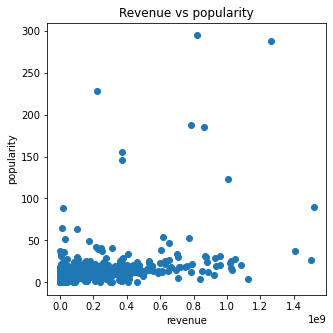

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(train_df['revenue'], train_df['popularity'])
ax.set_title('Revenue vs popularity');
ax.set_xlabel("revenue")
ax.set_ylabel("popularity")

La popolarità di un film è uno dei motivi principali per cui la gente va a vederlo. Infatti si può pensare possa essere una
feature molto utile nella fase di predizione. Si può anche osservare che vi è una correlazione complessivamente buona.

### Original Language

In [21]:
corr, _ = pearsonr(train_df['in_english'], train_df['revenue'])
print('Pearsons correlation between in_english and revenue: %.3f' % corr)

Pearsons correlation between in_english and revenue: 0.142


Text(6.799999999999997, 0.5, 'Revenue')

<Figure size 360x360 with 0 Axes>

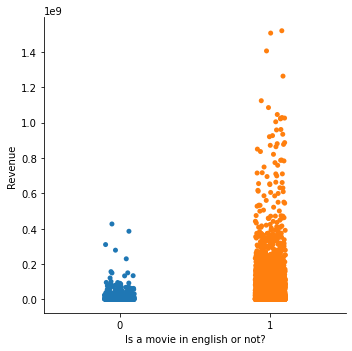

In [22]:
plt.figure(figsize=(5, 5))
sns.catplot(x='in_english', y='revenue', data=train_df)
plt.xlabel('Is a movie in english or not?')
plt.ylabel('Revenue')

Possiamo vedere che esiste, anche se debole, una correlazione positiva tra i film in inglese e le rispettive entrate. Sebbene i film in inglese raggiungano complessivamente un fatturato molto maggiore, ciò potrebbe essere semplicemente dovuto al fatto che il numero di film usciti in inglese è molto più alto.

### Poster Path

In [23]:
print('Movies missing a poster path:',train.poster_path.isna().sum())

Movies missing a poster path: 1


Solo 1 film nel training set ha la feature mancante, quindi probabilmente non è molto utile per il nostro modello, la lasciamo dunque perdere.

### Overview

In [24]:
corr, _ = pearsonr(train_df['overview'], train_df['revenue'])
print('Pearsons correlation between overview and revenue: %.3f' % corr)

Pearsons correlation between overview and revenue: -0.005


### Production companies

In [25]:
corr, _ = pearsonr(train_df['num_production_companies'], train_df['revenue'])
print('Pearsons correlation between num_production_companies and revenue: %.3f' % corr)

Pearsons correlation between num_production_companies and revenue: 0.154


### Production countries

Text(6.799999999999997, 0.5, 'Revenue')

<Figure size 360x360 with 0 Axes>

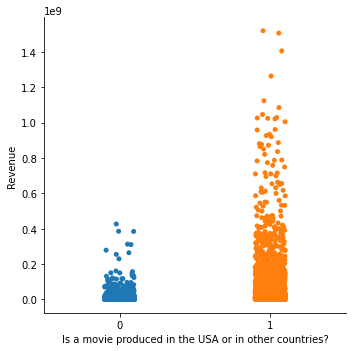

In [26]:
plt.figure(figsize=(5, 5))
sns.catplot(x='usa_produced', y='revenue', data=train_df);
plt.xlabel('Is a movie produced in the USA or in other countries?')
plt.ylabel('Revenue')

In [27]:
corr, _ = pearsonr(train_df['num_production_countries'], train_df['revenue'])
print('Pearsons correlation between number of production countries and revenue: %.3f' % corr)
corr, _ = pearsonr(train_df['usa_produced'], train_df['revenue'])
print('Pearsons correlation between usa_produced and revenue: %.3f' % corr)

Pearsons correlation between number of production countries and revenue: 0.053
Pearsons correlation between usa_produced and revenue: 0.198


### Release date

Text(0.5, 1.0, 'Mean revenue by day of week')

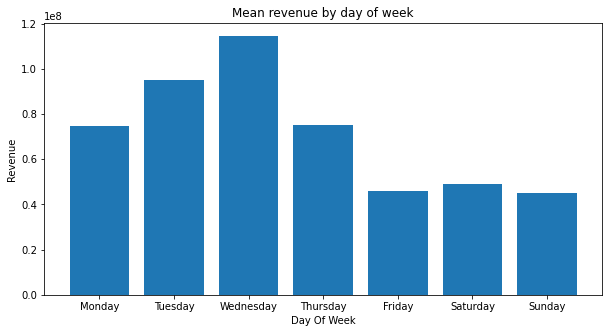

In [28]:
mean_rev_by_day_of_week = train_df.groupby('release_dayofweek')['revenue'].agg('mean')
langs=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(langs, mean_rev_by_day_of_week)
ax.set_xlabel('Day Of Week')
ax.set_ylabel('Revenue')
ax.set_title('Mean revenue by day of week')

Sorprendentemente, nonostante l'ipotesi che venerdì sia la data di rilascio più comune a causa di alcuni vantaggi monetari per le vendite, mercoledì (seguito da martedì e giovedì) ha le entrate più elevate.

Text(0.5, 1.0, 'Mean revenue by year')

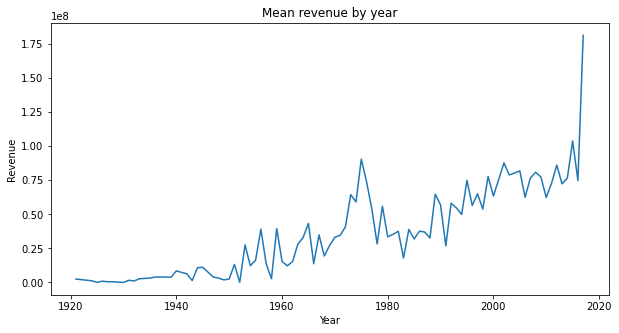

In [29]:
mean_rev_by_year = train_df.groupby('release_year')['revenue'].agg('mean')
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(mean_rev_by_year)
ax.set_xlabel('Year')
ax.set_ylabel('Revenue')
ax.set_title('Mean revenue by year')

Le entrate dei film generalmente aumentano di anno in anno, con un notevole picco in alcuni anni.

### Runtime

Text(0, 0.5, 'revenue')

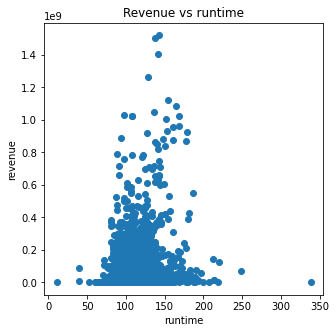

In [30]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(train_df['runtime'], train_df['revenue'])
ax.set_title('Revenue vs runtime');
ax.set_xlabel("runtime")
ax.set_ylabel("revenue")

In [31]:
corr, _ = pearsonr(train_df['runtime'], train_df['revenue'])
print('Pearsons correlation betweeb runtime and revenue: %.3f' % corr)

Pearsons correlation betweeb runtime and revenue: 0.220


### Spoken languages

In [32]:
corr, _ = pearsonr(train_df['num_spoken_languages'], train_df['revenue'])
print('Pearsons correlation between num_spoken_languages and revenue: %.3f' % corr)

Pearsons correlation between num_spoken_languages and revenue: 0.065


### Status

Questo attributo lo eliminiamo in quanto risulta avere valori costanti, di conseguenza non utili ai fini della costruzione del modello

### Tagline

Text(6.799999999999997, 0.5, 'Revenue')

<Figure size 360x360 with 0 Axes>

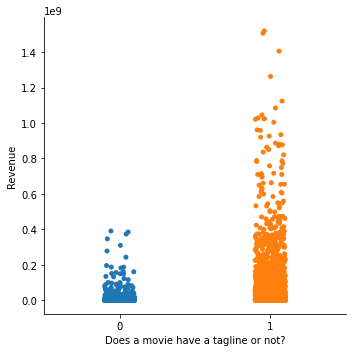

In [33]:
plt.figure(figsize=(5, 5))
sns.catplot(x='tagline', y='revenue', data=train_df);
plt.xlabel('Does a movie have a tagline or not?')
plt.ylabel('Revenue')

In [34]:
corr, _ = pearsonr(train_df['tagline'], train_df['revenue'])
print('Pearsons correlation between tagline and revenue: %.3f' % corr)

Pearsons correlation between tagline and revenue: 0.180


### Keywords

Text(6.799999999999997, 0.5, 'Revenue')

<Figure size 360x360 with 0 Axes>

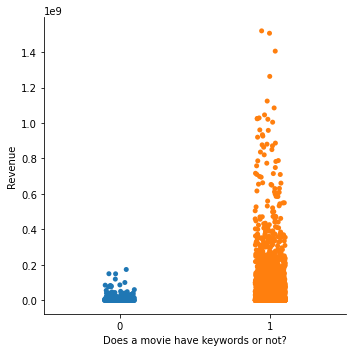

In [35]:
plt.figure(figsize=(5, 5))
sns.catplot(x='Keywords', y='revenue', data=train_df);
plt.xlabel('Does a movie have keywords or not?')
plt.ylabel('Revenue')

In [36]:
corr, _ = pearsonr(train_df['Keywords'], train_df['revenue'])
print('Pearsons correlation between Keywords and revenue: %.3f' % corr)

Pearsons correlation between Keywords and revenue: 0.129


### Cast

In [37]:
corr, _ = pearsonr(train_df['num_cast'], train_df['revenue'])
print('Pearsons correlation between num_cast and revenue: %.3f' % corr)

Pearsons correlation between num_cast and revenue: 0.336


In [38]:
corr, _ = pearsonr(train_df['num_top_actors'], train_df['revenue'])
print('Pearsons correlation between num_top_actors and revenue: %.3f' % corr)

Pearsons correlation between num_top_actors and revenue: 0.441


In [39]:
corr, _ = pearsonr(train_df['num_female_cast'], train_df['revenue'])
print('Pearsons correlation between num_female_cast and revenue: %.3f' % corr)

Pearsons correlation between num_female_cast and revenue: 0.224


In [40]:
corr, _ = pearsonr(train_df['num_male_cast'], train_df['revenue'])
print('Pearsons correlation between num_female_cast and revenue: %.3f' % corr)

Pearsons correlation between num_female_cast and revenue: 0.373


### Crew

In [41]:
corr, _ = pearsonr(train_df['num_crew'], train_df['revenue'])
print('Pearsons correlation between num_crew and revenue: %.3f' % corr)

Pearsons correlation between num_crew and revenue: 0.372


In [42]:
corr, _ = pearsonr(train_df['num_female_crew'], train_df['revenue'])
print('Pearsons correlation between num_female_crew and revenue: %.3f' % corr)

Pearsons correlation between num_female_crew and revenue: 0.267


In [43]:
corr, _ = pearsonr(train_df['num_male_crew'], train_df['revenue'])
print('Pearsons correlation between num_male_crew and revenue: %.3f' % corr)

Pearsons correlation between num_male_crew and revenue: 0.383


# Modeling

## 1. Linear Regression

In [44]:
y = train_df['revenue']
y = np.log1p(y)
X = train_df.drop('revenue', axis = 1)

In [45]:
def rmse(y_pred, y_true):
    return np.sqrt(mean_squared_error(y_pred, y_true))

### Testing a regression model

Train MSE: 5.240
Test MSE : 5.828
Train RMSE : 2.289
Test RMSE : 2.414
Model score 0.412 


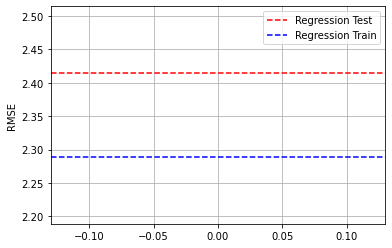

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_train[y_pred_train<0] = 0
y_pred_test = model.predict(X_test)
y_pred_test[y_pred_test<0] = 0

reg_train_err = mean_squared_error(y_true = y_train, y_pred = y_pred_train)
reg_test_err = mean_squared_error(y_true = y_test, y_pred = y_pred_test)

print ("Train MSE: {:.3f}".format(reg_train_err) )
print ("Test MSE : {:.3f}".format(reg_test_err) )
print("Train RMSE : {:.3f}".format(np.sqrt(reg_train_err)))
print("Test RMSE : {:.3f}".format(np.sqrt(reg_test_err)))
print("Model score {:.3f} ".format(model.score(X_test, y_test)))

fig, ax = plt.subplots()
ax.axhline(y=np.sqrt(reg_test_err), c='red', ls="--", label="Regression Test")
ax.axhline(y=np.sqrt(reg_train_err), c='blue', ls="--", label="Regression Train")
ax.set_ylabel("RMSE")
ax.margins(0.8, 0.8)   
ax.grid()
ax.legend()

### PCA

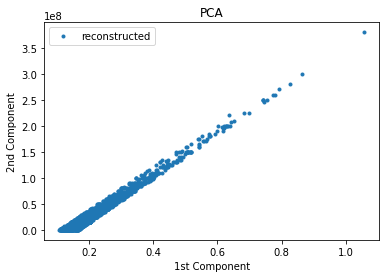

In [47]:
X = train_df.drop('revenue', axis = 1)
X_std = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_2 = pca.fit_transform(X)
X_approx = pca.inverse_transform(X_2)

fig, ax = plt.subplots()
ax.plot(X_approx[:,0], X_approx[:,1], '.', label="reconstructed")
ax.set_title("PCA")
ax.set_xlabel("1st Component")
ax.set_ylabel("2nd Component")
ax.legend()

## 2. Decision Trees

### Single Tree

In [48]:
y = train_df['revenue']
y = np.log1p(y)
X = train_df.drop('revenue', axis = 1)

Leaves:  2 - Train Accuracy: 0.246 - Validation Accuracy: 0.275
Leaves:  3 - Train Accuracy: 0.350 - Validation Accuracy: 0.359
Leaves:  4 - Train Accuracy: 0.387 - Validation Accuracy: 0.411
Leaves:  5 - Train Accuracy: 0.407 - Validation Accuracy: 0.424
Leaves:  6 - Train Accuracy: 0.422 - Validation Accuracy: 0.435
Leaves:  7 - Train Accuracy: 0.437 - Validation Accuracy: 0.429
Leaves:  8 - Train Accuracy: 0.452 - Validation Accuracy: 0.443
Leaves:  9 - Train Accuracy: 0.465 - Validation Accuracy: 0.460
Leaves: 10 - Train Accuracy: 0.476 - Validation Accuracy: 0.462
Leaves: 11 - Train Accuracy: 0.487 - Validation Accuracy: 0.418
Leaves: 12 - Train Accuracy: 0.496 - Validation Accuracy: 0.412
Leaves: 13 - Train Accuracy: 0.504 - Validation Accuracy: 0.422
Leaves: 14 - Train Accuracy: 0.511 - Validation Accuracy: 0.421
Leaves: 15 - Train Accuracy: 0.518 - Validation Accuracy: 0.421
Leaves: 16 - Train Accuracy: 0.525 - Validation Accuracy: 0.438
Leaves: 17 - Train Accuracy: 0.531 - Val

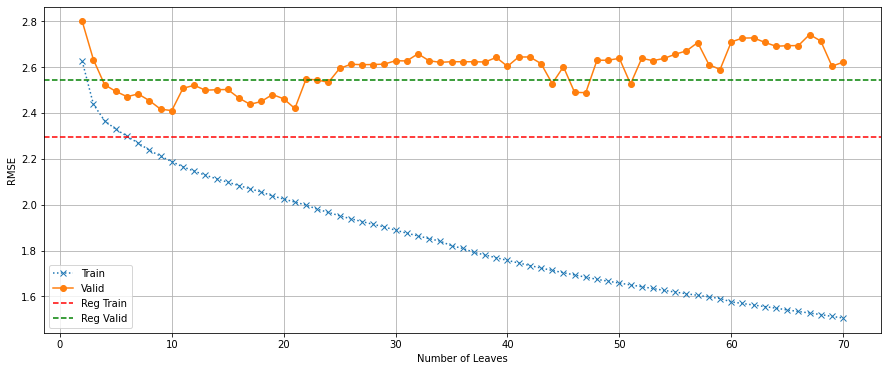

In [49]:
X_train_80, X_test, y_train_80, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_80, y_train_80, test_size=0.20, random_state=10)

accuracies = []
errors = []

for max_leaves in range(2,71):
    
    dt = tree.DecisionTreeRegressor(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)

    # compute Accuracy
    train_acc = dt.score(X_train, y_train)
    valid_acc = dt.score(X_valid, y_valid)
    # compute RMSE
    train_err = rmse(dt.predict(X_train), y_train)
    valid_err = rmse(dt.predict(X_valid), y_valid)
    print ("Leaves: {:2d} - Train Accuracy: {:.3f} - Validation Accuracy: {:.3f}".format(max_leaves,  train_acc, valid_acc) )
    
    accuracies += [ [valid_acc, max_leaves] ]
    errors += [ [valid_err, train_err, max_leaves] ]

errors = np.array(errors)
best_accuracy, best_max_leaves = max(accuracies)
print ( "Best Max Leaves", best_max_leaves )

dt = tree.DecisionTreeRegressor(max_leaf_nodes=best_max_leaves)
dt.fit(X_train_80,y_train_80)

test_acc = dt.score(X_test, y_test)
print ("Test Accuracy: {:.3f}".format(test_acc) )
print("Best RMSE: ", min(errors[:,0]))

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

reg_train_err = rmse(y_pred=reg.predict(X_train), y_true=y_train)
reg_valid_err = rmse(y_pred=reg.predict(X_valid), y_true=y_valid)
print ("Reg_Valid Accuracy: {:.3f}".format(reg.score(X_valid, y_valid)) )
print("Reg_RMSE: ", reg_valid_err)


fig, ax = plt.subplots(figsize=(15,6))
ax.plot(errors[:,2], errors[:,1], "x:", label="Train")
ax.plot(errors[:,2], errors[:,0], "o-", label="Valid")
ax.axhline(y=reg_train_err, c='red', ls="--", label="Reg Train")
ax.axhline(y=reg_valid_err, c='green', ls="--", label="Reg Valid")
ax.set_ylabel("RMSE")
ax.set_xlabel("Number of Leaves")
ax.grid()
ax.legend()


### Increasing the complexity of a decision tree

Best leaves Number:  92
Best RMSE:  2.0045069121286887


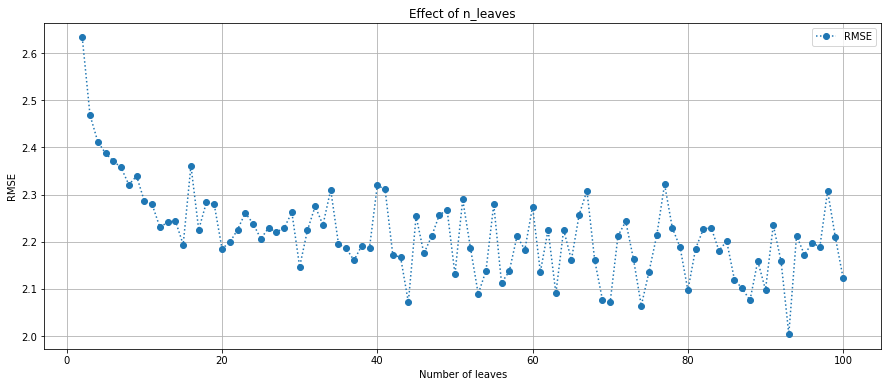

In [50]:
N_TESTS = 20

scores = []

n_leaves = range(2,101)

for l in n_leaves:
    for i in range(N_TESTS):
        Xs, ys = resample(X,y, n_samples=int(0.67*len(y)) )
        dt = tree.DecisionTreeRegressor(max_leaf_nodes=l)
        dt.fit(Xs,ys)
        
        y_pred = dt.predict(X)
        
    dt_rmse = rmse(y_pred, y)
    scores.append(dt_rmse.mean())
    
n_final = scores.index([min(scores)])+1
print("Best leaves Number: ", n_final) 
print("Best RMSE: ", min(scores))  

fig, ax = plt.subplots(figsize=(15,6))

ax.plot(n_leaves, scores, 'o:', label='RMSE')
ax.set_title("Effect of n_leaves")
ax.set_xlabel('Number of leaves')
ax.set_ylabel('RMSE')
ax.grid()
ax.legend()

### k-fold Cross-validation

Leaves:  2 - Validation Accuracy: 2.657
Leaves:  3 - Validation Accuracy: 2.502
Leaves:  4 - Validation Accuracy: 2.430
Leaves:  5 - Validation Accuracy: 2.409
Leaves:  6 - Validation Accuracy: 2.370
Leaves:  7 - Validation Accuracy: 2.377
Leaves:  8 - Validation Accuracy: 2.361
Leaves:  9 - Validation Accuracy: 2.368
Leaves: 10 - Validation Accuracy: 2.373
Leaves: 11 - Validation Accuracy: 2.364
Leaves: 12 - Validation Accuracy: 2.338
Leaves: 13 - Validation Accuracy: 2.333
Leaves: 14 - Validation Accuracy: 2.373
Leaves: 15 - Validation Accuracy: 2.375
Leaves: 16 - Validation Accuracy: 2.368
Leaves: 17 - Validation Accuracy: 2.352
Leaves: 18 - Validation Accuracy: 2.375
Leaves: 19 - Validation Accuracy: 2.346
Leaves: 20 - Validation Accuracy: 2.386
Leaves: 21 - Validation Accuracy: 2.393
Leaves: 22 - Validation Accuracy: 2.435
Leaves: 23 - Validation Accuracy: 2.392
Leaves: 24 - Validation Accuracy: 2.407
Leaves: 25 - Validation Accuracy: 2.402
Leaves: 26 - Validation Accuracy: 2.439


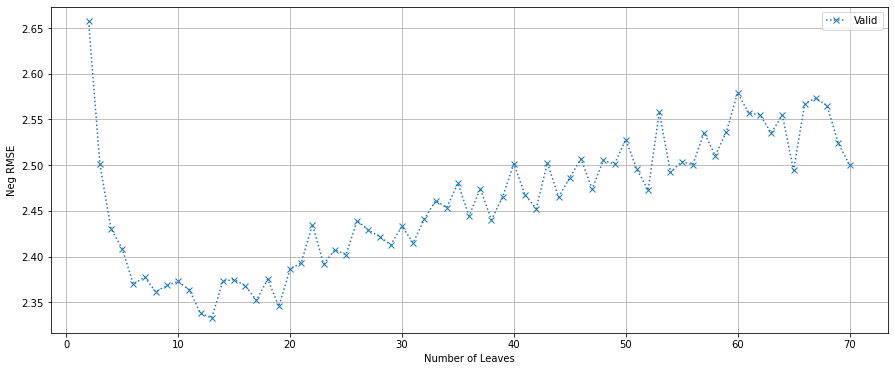

In [51]:
X_train_80, X_test, y_train_80, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

accuracies = []

for max_leaves in range(2,71):
   
    dt = tree.DecisionTreeRegressor(max_leaf_nodes=max_leaves)
    scores = cross_val_score(dt, X_train_80, y_train_80, 
                         cv=5, scoring='neg_root_mean_squared_error', 
                         verbose = 0)
    valid_acc = -scores.mean()
    print ("Leaves: {:2d} - Validation Accuracy: {:.3f}".format(max_leaves,  valid_acc) )
    
    accuracies += [ [valid_acc, max_leaves] ]

best_accuracy, best_max_leaves = min(accuracies)
print ( "Best Max Leaves", best_max_leaves )
print("Best RMSE: ", best_accuracy) 

dt = tree.DecisionTreeRegressor(max_leaf_nodes=best_max_leaves)
dt.fit(X_train_80,y_train_80)

test_acc = dt.score(X_test, y_test)
print ("Test Accuracy: {:.3f}".format(test_acc) )

accuracies = np.array(accuracies)

fig, ax = plt.subplots(figsize=(15,6))
ax.plot(accuracies[:,1], accuracies[:,0], "x:", label="Valid")
ax.set_ylabel("Neg RMSE")
ax.set_xlabel("Number of Leaves")
ax.grid()
ax.legend()

## 3. Random Forest

Best Trees Number:  38
Best RMSE:  1.5566897715999364


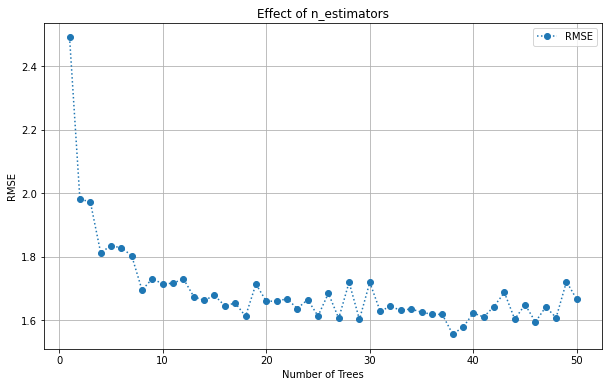

In [52]:
N_TESTS = 10

scores = []

boosts = range(1,51)
for l in boosts:
    for i in range(N_TESTS):
        Xs, ys = resample(X,y, n_samples=int(0.67*len(y)) )

        rf = RandomForestRegressor(n_estimators=l)
        rf.fit(Xs, ys)
        
        y_pred = rf.predict(X)
    dt_rmse = rmse(y_pred, y)
    scores.append(dt_rmse.mean())

n_trees = scores.index([min(scores)])+1
print("Best Trees Number: ", n_trees) 
print("Best RMSE: ", min(scores)) 

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(boosts, scores, 'o:', label='RMSE')
ax.set_title("Effect of n_estimators")
ax.set_xlabel('Number of Trees')
ax.set_ylabel('RMSE')
ax.grid()
ax.legend()

### Feature Importance

Best number of features: 41
Best RMSE: 2.0906248053235905


Text(0.5, 0, 'Number of Best features used')

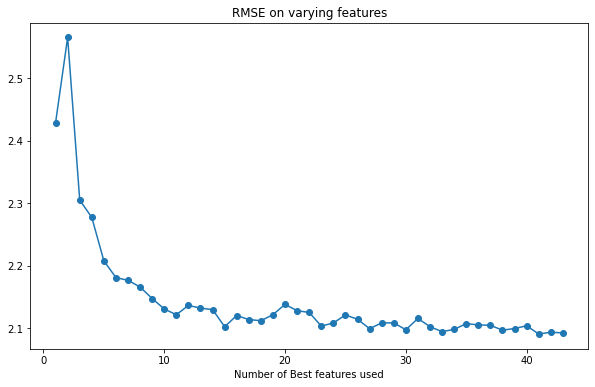

In [53]:
rf2 = RandomForestRegressor(n_estimators=n_trees)
rf2.fit(X,y)
X_arr = np.array(X)
best_features = np.argsort(rf2.feature_importances_)[::-1]

rmse = []

for f in range(1,len(best_features)+1):
    rf_small = RandomForestRegressor(n_estimators=n_trees)
    scores = cross_val_score(rf_small, 
                             X_arr[:,best_features[:f]], y, 
                             cv=5, scoring='neg_root_mean_squared_error')
    rmse += [-scores.mean()]
    
n_features = rmse.index([min(rmse)])+1
print ("Best number of features:", n_features)
print ("Best RMSE:", min(rmse))

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(range(1,len(best_features)+1), rmse, 'o-', label="RMSE")
ax.set_title("RMSE on varying features")
ax.set_xlabel("Number of Best features used")

In [54]:
rf2.feature_importances_

array([0.00862195, 0.2572466 , 0.04057144, 0.00271803, 0.01432072,
       0.02533822, 0.15709556, 0.04033916, 0.00407979, 0.00299103,
       0.01877601, 0.01797991, 0.01727856, 0.00193579, 0.01717269,
       0.0093695 , 0.02241591, 0.00857238, 0.01150412, 0.00951963,
       0.00212766, 0.01362669, 0.0103596 , 0.0013139 , 0.00177684,
       0.00126323, 0.00121402, 0.00097156, 0.01118468, 0.00690862,
       0.00312485, 0.01140877, 0.00159423, 0.01441074, 0.02405025,
       0.04475816, 0.0136261 , 0.00265627, 0.00122642, 0.00202643,
       0.00175288, 0.00136654, 0.13940458])

Text(0.5, 1.0, 'Feature Importances')

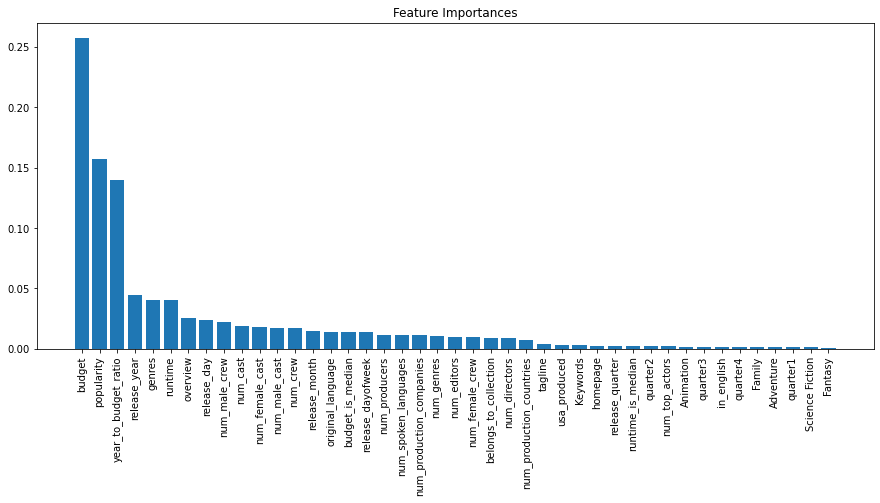

In [55]:
index = np.argsort(rf2.feature_importances_,)[::-1]
fig, ax = plt.subplots(figsize=(15,6))
ax.bar(np.array(X.columns.tolist())[index], rf2.feature_importances_[index])
plt.xticks(rotation=90)
ax.set_title("Feature Importances")

In [56]:
predictions = np.expm1(rf2.predict(test_df))
submission = pd.DataFrame({'id' : test_index, 'revenue' : np.round(predictions)})
submission.to_csv('submission.csv', index = False)

In [57]:
submission.head()

,id,revenue
0,3001,5290365.0
1,3002,820690.0
2,3003,17092382.0
3,3004,8967913.0
4,3005,148421.0
